In [1]:
from keras import layers
from keras import models

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


c:\Users\ZhuoWang\.conda\envs\tf2\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


#### 数据预处理

In [5]:
train_dir = 'D:/MyFolder/Work/Code/DeepLearning/小型数据集训练卷积神经网络_CNN/dataset/train'
validation_dir = 'D:/MyFolder/Work/Code/DeepLearning/小型数据集训练卷积神经网络_CNN/dataset/validation'

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
train_generator.next()

(array([[[[0.56078434, 0.56078434, 0.56078434],
          [0.5686275 , 0.5686275 , 0.5686275 ],
          [0.58431375, 0.58431375, 0.58431375],
          ...,
          [0.43137258, 0.43529415, 0.4156863 ],
          [0.3647059 , 0.36862746, 0.34901962],
          [0.3372549 , 0.34117648, 0.32156864]],
 
         [[0.63529414, 0.63529414, 0.63529414],
          [0.63529414, 0.63529414, 0.63529414],
          [0.63529414, 0.63529414, 0.63529414],
          ...,
          [0.43529415, 0.43921572, 0.41960788],
          [0.36862746, 0.37254903, 0.3529412 ],
          [0.34117648, 0.34509805, 0.3254902 ]],
 
         [[0.6313726 , 0.6313726 , 0.6313726 ],
          [0.6313726 , 0.6313726 , 0.6313726 ],
          [0.63529414, 0.63529414, 0.63529414],
          ...,
          [0.43921572, 0.4431373 , 0.42352945],
          [0.37254903, 0.37647063, 0.35686275],
          [0.34509805, 0.34901962, 0.32941177]],
 
         ...,
 
         [[0.24705884, 0.20784315, 0.21176472],
          [0.22745

In [7]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 10s 36ms/step - loss: 0.6925 - acc: 0.5350 - val_loss: 0.6743 - val_acc: 0.5370
Epoch 2/30
100/100 [==============================] - 3s 26ms/step - loss: 0.6616 - acc: 0.6130 - val_loss: 0.6498 - val_acc: 0.6180
Epoch 3/30
100/100 [==============================] - 3s 27ms/step - loss: 0.6220 - acc: 0.6575 - val_loss: 0.6316 - val_acc: 0.6310
Epoch 4/30
100/100 [==============================] - 3s 26ms/step - loss: 0.5731 - acc: 0.7000 - val_loss: 0.5945 - val_acc: 0.6660
Epoch 5/30
100/100 [==============================] - 3s 26ms/step - loss: 0.5472 - acc: 0.7050 - val_loss: 0.5830 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 3s 26ms/step - loss: 0.5132 - acc: 0.7425 - val_loss: 0.5688 - val_acc: 0.7100
Epoch 7/30
100/100 [==============================] - 3s 26ms/step - loss: 0.4896 - acc: 0.7740 - val_loss: 0.5823 - val_acc: 0.6840
Epoch 8/30
100/100 [==============================] - 3s 26ms/step -

In [8]:
model.save('cats_and_dogs_small_1.h5')

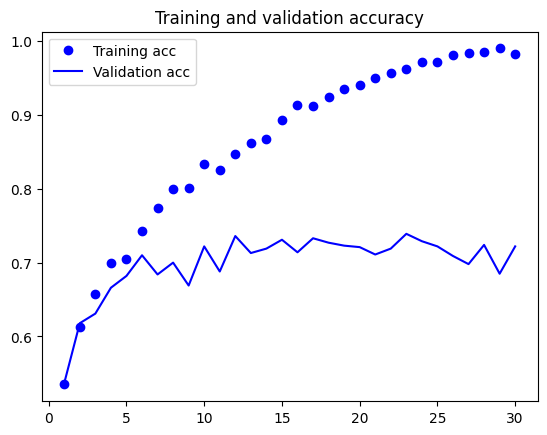

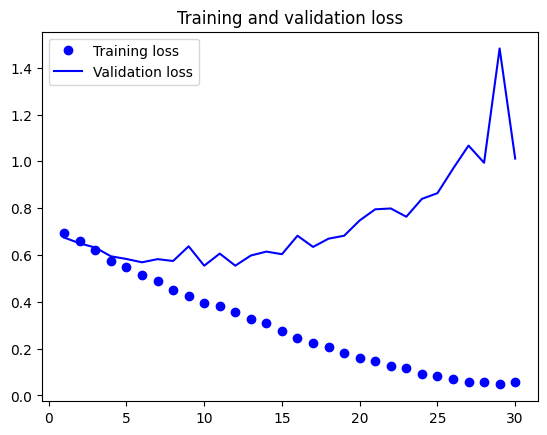

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()